In [1]:
# --- Universal Setup Cell (works for any phase) ---
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

ROOT = Path(r"C:\DOCTORAL HUB\nmr_pipeline_project")
print(f" Project root set to: {ROOT.resolve()}")

# Quick file existence check
expected_files = [
    ROOT / "data/merged/merged_phase3_clean.csv",
]
for f in expected_files:
    print(f"{'Done' if f.exists() else 'No'} {f.name} -> {f}")


 Project root set to: C:\DOCTORAL HUB\nmr_pipeline_project
Done merged_phase3_clean.csv -> C:\DOCTORAL HUB\nmr_pipeline_project\data\merged\merged_phase3_clean.csv


In [2]:
# --- Load the cleaned merged dataset ---
data_path = ROOT / "data/merged/merged_phase3_clean.csv"
df = pd.read_csv(data_path)
print(f" Dataset loaded successfully: {df.shape}")
display(df.head(3))


 Dataset loaded successfully: (434147, 138)


,mol_idx,atom_index,element_x,shift_ppm_x,element_y,shift_ppm_y,hose_1,hose_2,hose_3,hose_4,...,bit_118,bit_119,bit_120,bit_121,bit_122,bit_123,bit_124,bit_125,bit_126,bit_127
0,1,11,C,17.6,C,17.6,C,C-CO,C-CO-CC,C-CO-CC-CCCO,...,0,0,0,0,0,0,0,0,0,0
1,1,1,C,18.3,C,18.3,C,C-CC,C-CC-CC,C-CC-CC-CCCCC,...,0,0,0,0,0,0,0,0,0,0
2,1,13,C,22.6,C,22.6,C,C-CO,C-CO-CCO,C-CO-CCO-CCCCC,...,0,0,0,0,0,0,0,0,0,0


 Starting EDA on Phase 3 merged dataset...



###  Dataset Overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434147 entries, 0 to 434146
Columns: 138 entries, mol_idx to bit_127
dtypes: float64(2), int64(130), object(6)
memory usage: 457.1+ MB


None

,count,mean,std,min,25%,50%,75%,max
mol_idx,434147.0,24975.924565,17054.010572,1.0,10063.50,21382.0,41350.0,64745.0
atom_index,434147.0,8.895068,8.208982,1.0,4.00,7.0,11.0,114.0
shift_ppm_x,434147.0,94.272575,52.393799,-10.0,39.43,114.4,132.7,389.8
shift_ppm_y,434147.0,94.272575,52.393799,-10.0,39.43,114.4,132.7,389.8
bit_0,434147.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
bit_1,434147.0,0.173361,0.378559,0.0,0.00,0.0,0.0,1.0
bit_2,434147.0,0.000009,0.003035,0.0,0.00,0.0,0.0,1.0
bit_3,434147.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
bit_4,434147.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
bit_5,434147.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


###  Missing Values Check

 No missing values detected.


###  Duplicate Check

Total duplicates (mol_idx + atom_index): 0


###  Chemical Shift Distribution

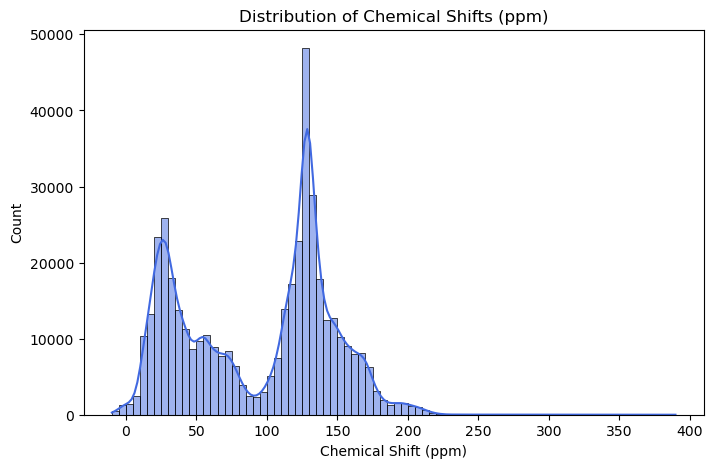

###  Feature Correlations (Quick View)

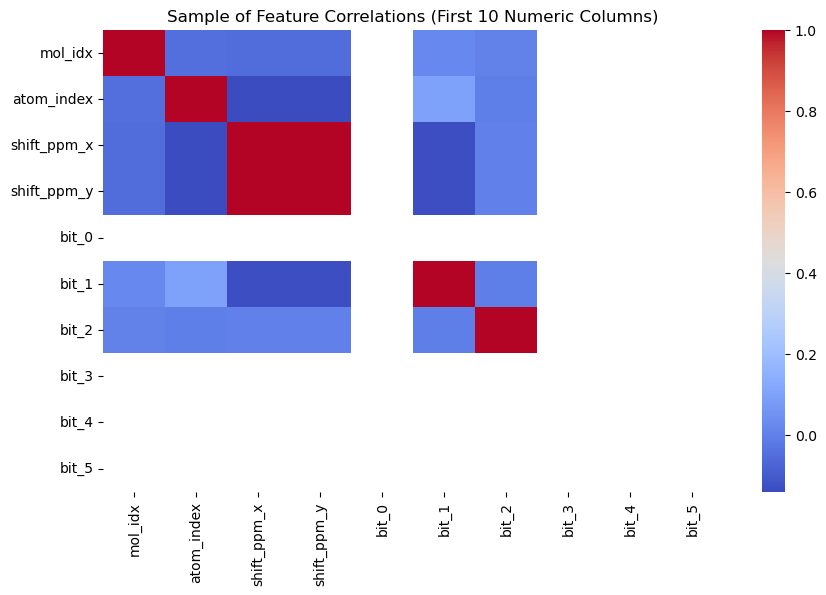

###  Unique Atom Elements

element_x
C     421902
P      10650
O        378
N        327
B        311
H        286
F        228
Si        33
S         24
Ge         6
Cl         1
K          1
Name: count, dtype: int64


In [3]:
# --- Phase 4: Exploratory Data Analysis (EDA) ---
import matplotlib.pyplot as plt
import seaborn as sns

print(" Starting EDA on Phase 3 merged dataset...\n")

# --- Basic information ---
display(Markdown("###  Dataset Overview"))
display(df.info())
display(df.describe().T.head(10))

# --- Missing values ---
display(Markdown("###  Missing Values Check"))
missing = df.isna().sum()
missing = missing[missing > 0]
if len(missing) == 0:
    print(" No missing values detected.")
else:
    display(missing)

# --- Duplicates ---
display(Markdown("###  Duplicate Check"))
dup_count = df.duplicated(subset=["mol_idx", "atom_index"]).sum()
print(f"Total duplicates (mol_idx + atom_index): {dup_count}")

# --- Chemical shift distribution ---
display(Markdown("###  Chemical Shift Distribution"))
plt.figure(figsize=(8, 5))
sns.histplot(df["shift_ppm_x"], bins=80, kde=True, color="royalblue")
plt.xlabel("Chemical Shift (ppm)")
plt.ylabel("Count")
plt.title("Distribution of Chemical Shifts (ppm)")
plt.show()

# --- Correlation between HOSE and ECFP features (quick view) ---
display(Markdown("###  Feature Correlations (Quick View)"))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.iloc[:10, :10], cmap="coolwarm", annot=False)
plt.title("Sample of Feature Correlations (First 10 Numeric Columns)")
plt.show()

# --- Unique elements ---
display(Markdown("###  Unique Atom Elements"))
print(df["element_x"].value_counts())


In [4]:
# --- Phase 4: Feature Preparation and Data Split ---
from sklearn.model_selection import train_test_split
from IPython.display import Markdown

display(Markdown("### Phase 4 — Feature Preparation and Data Split"))

target_col = "shift_ppm_x"

# Use all fingerprint columns (bit_XXX)
ecfp_cols = [col for col in df.columns if col.startswith("bit_")]

# Define X (features) and y (target)
X = df[ecfp_cols]
y = df[target_col]

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Features selected: {len(ecfp_cols)} ECFP bits")
print(f" X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f" Target: {target_col} — y_train: {y_train.shape}, y_test: {y_test.shape}")


### Phase 4 — Feature Preparation and Data Split

 Features selected: 128 ECFP bits
 X_train: (347317, 128), X_test: (86830, 128)
 Target: shift_ppm_x — y_train: (347317,), y_test: (86830,)


In [ ]:
# --- Phase 4: Baseline Model Training (Random Forest) ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import time

display(Markdown("###  Baseline Model — Random Forest Regressor"))

start = time.time()

# Initialize model (optimized for balance between performance and memory)
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=25,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Train
rf.fit(X_train, y_train)
end = time.time()

print(f" Training complete in {end - start:.2f} seconds")


###  Baseline Model — Random Forest Regressor

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    2.8s


 Training complete in 15.91 seconds


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.5s finished


### Model Evaluation

[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 150 out of 150 | elapsed:    0.1s finished


 Mean Absolute Error (MAE): 42.851 ppm
 Root Mean Squared Error (RMSE): 50.109 ppm
 R² Score: 0.086


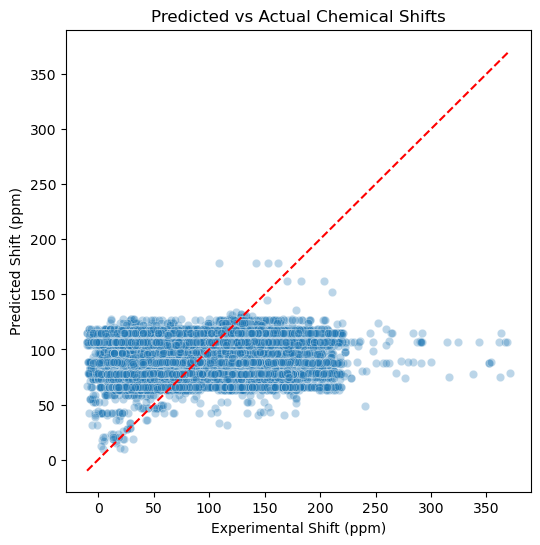

In [6]:
# --- Phase 4: Model Evaluation ---
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

display(Markdown("### Model Evaluation"))

# Predictions
y_pred = rf.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): {mae:.3f} ppm")
print(f" Root Mean Squared Error (RMSE): {rmse:.3f} ppm")
print(f" R² Score: {r2:.3f}")

# Plot predicted vs. actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Experimental Shift (ppm)")
plt.ylabel("Predicted Shift (ppm)")
plt.title("Predicted vs Actual Chemical Shifts")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [7]:
# --- Check Variance in ECFP Bits ---
bit_variance = X.var().sort_values()
zero_var_bits = bit_variance[bit_variance == 0].index.tolist()

print(f" Bits with zero variance: {len(zero_var_bits)} / {len(X.columns)}")
print(f"Example constant bits: {zero_var_bits[:10]}")

# Show a summary
bit_variance.describe()


 Bits with zero variance: 103 / 128
Example constant bits: ['bit_0', 'bit_3', 'bit_5', 'bit_4', 'bit_6', 'bit_7', 'bit_9', 'bit_8', 'bit_12', 'bit_13']


count    128.000000
mean       0.007597
std        0.034934
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.246396
dtype: float64

In [8]:
# --- Remove zero-variance bits and retrain ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Drop constant bits
X_filtered = X.drop(columns=zero_var_bits)
print(f" Features after removing constant bits: {X_filtered.shape[1]}")

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Retrain model
rf.fit(X_train, y_train)

# Reevaluate
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.3f} ppm | RMSE: {rmse:.3f} ppm | R²: {r2:.3f}")


 Features after removing constant bits: 25


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    2.3s


 MAE: 42.851 ppm | RMSE: 50.109 ppm | R²: 0.086


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.4s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 150 out of 150 | elapsed:    0.1s finished
